In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_org=pd.read_csv('Dataset.csv')
df=df_org.copy()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

DATA PREPROCESSING
-----

In [5]:
ds=df.copy()
ds.drop(columns=['CUST_ID'], inplace=True)
ds.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
ds.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


In [7]:
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df.dropna(inplace=True)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

EDA (and data cleaning)
---------

In [8]:
#introducing some new features
df['PURCHASES_RATIO'] = df['PURCHASES'] / df['CREDIT_LIMIT']
df['BALANCE_USAGE'] = df['BALANCE'] / df['CREDIT_LIMIT']
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_RATIO,BALANCE_USAGE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.095400,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.103089,0.332687
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0.199867,0.222223
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.013333,0.681429


In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_RATIO,BALANCE_USAGE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,844.999569,0.153732,11.517935,0.262638,0.388926
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.906149,0.292511,1.337134,0.436679,0.389722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000,0.011111,0.041527
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.343947,0.000000,12.000000,0.117275,0.302870
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000,0.337624,0.717582
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,8.591310,15.909951


In [10]:
df=df[df['BALANCE_USAGE']<3] #balance greater than 3 times the credit limit seems an error.
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_RATIO,BALANCE_USAGE
count,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000,8948.000000
mean,1564.733550,0.877347,1003.429063,592.569789,411.159524,978.434603,0.490460,0.202503,0.364519,0.135100,3.248771,14.713120,4494.946148,1732.684201,845.048154,0.153699,11.517881,0.262668,0.387192
std,2081.684458,0.236811,2136.820925,1660.049795,904.418300,2096.793357,0.401349,0.298354,0.397455,0.200106,6.825306,24.859454,3638.715677,2894.672200,2333.031991,0.292511,1.337199,0.436694,0.353514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000
25%,128.337827,0.888889,39.822500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.280622,170.869627,0.000000,12.000000,0.011132,0.041516
50%,873.942013,1.000000,361.610000,38.200000,89.180000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,0.117283,0.302720
75%,2054.525476,1.000000,1110.232500,577.887500,468.737500,1113.726110,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1900.844310,788.880473,0.142857,12.000000,0.337679,0.717550
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,8.591310,2.325422


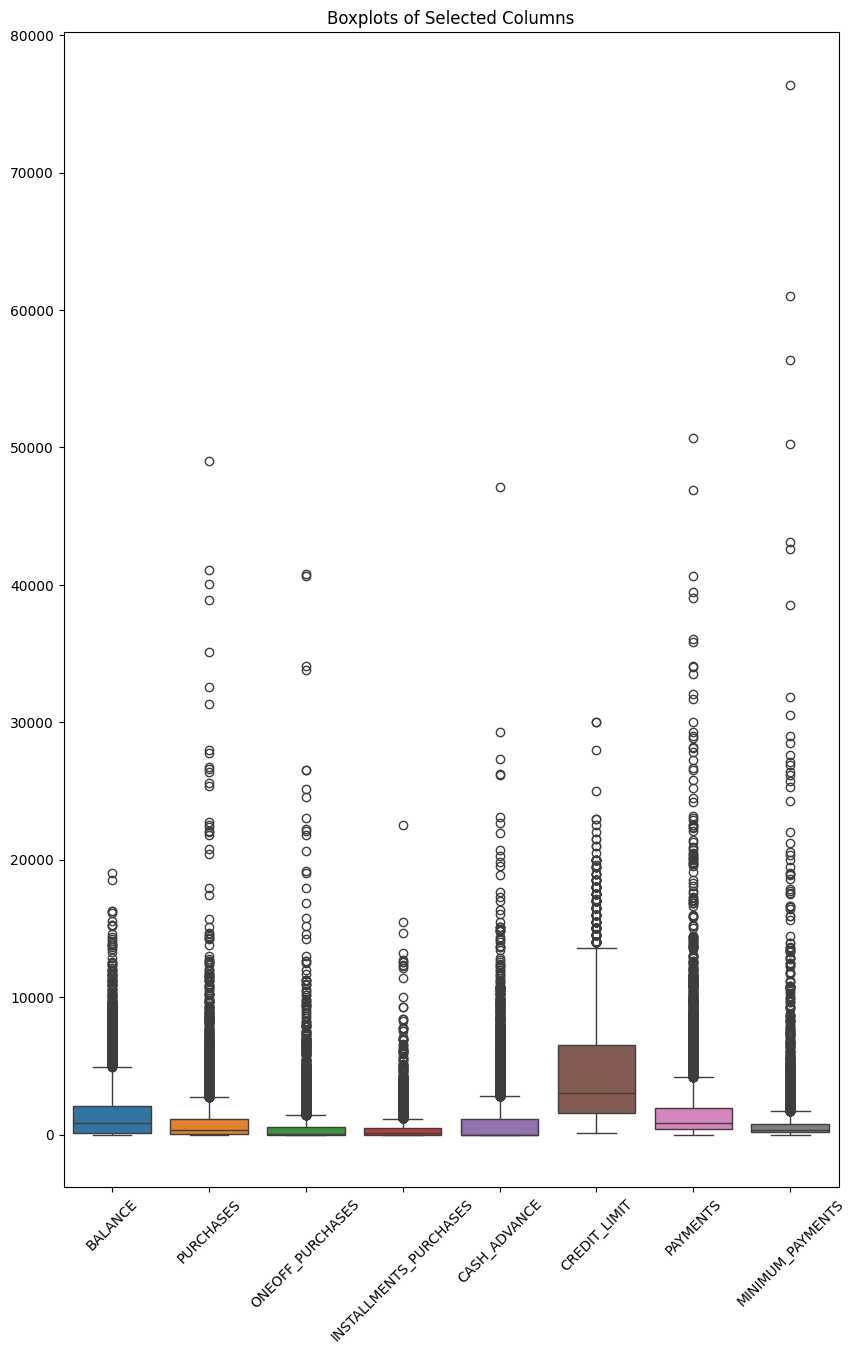

In [11]:
#
columns_to_plot = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']

plt.figure(figsize=(10, 15))
sns.boxplot(data=df[columns_to_plot])

plt.title('Boxplots of Selected Columns')
plt.xticks(rotation=45)
ylim = plt.ylim()
# plt.yticks(range(0,50000,5000))  # Change step as needed
plt.show()

In [12]:
#Removing data where outliers are no longer concentrated as removing all outliers may cause significant data loss.
dict1={'BALANCE':15000, 'PURCHASES':13000, 'ONEOFF_PURCHASES':12000, 'INSTALLMENTS_PURCHASES':8000,'CASH_ADVANCE':15000,'CREDIT_LIMIT':15000,'PAYMENTS':22000,'MINIMUM_PAYMENTS':13000}

for feature, threshold in dict1.items():
    df=df[df[feature]<threshold]
df.shape

(8674, 20)

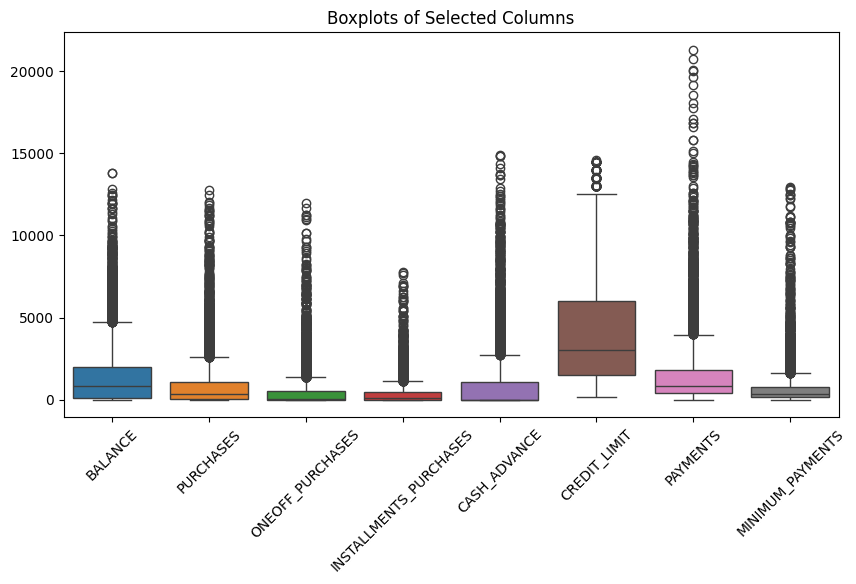

In [13]:
columns_to_plot = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[columns_to_plot])

plt.title('Boxplots of Selected Columns')
plt.xticks(rotation=45)
ylim = plt.ylim()
# plt.yticks(range(0,50000,5000))  # Change step as needed
plt.show()

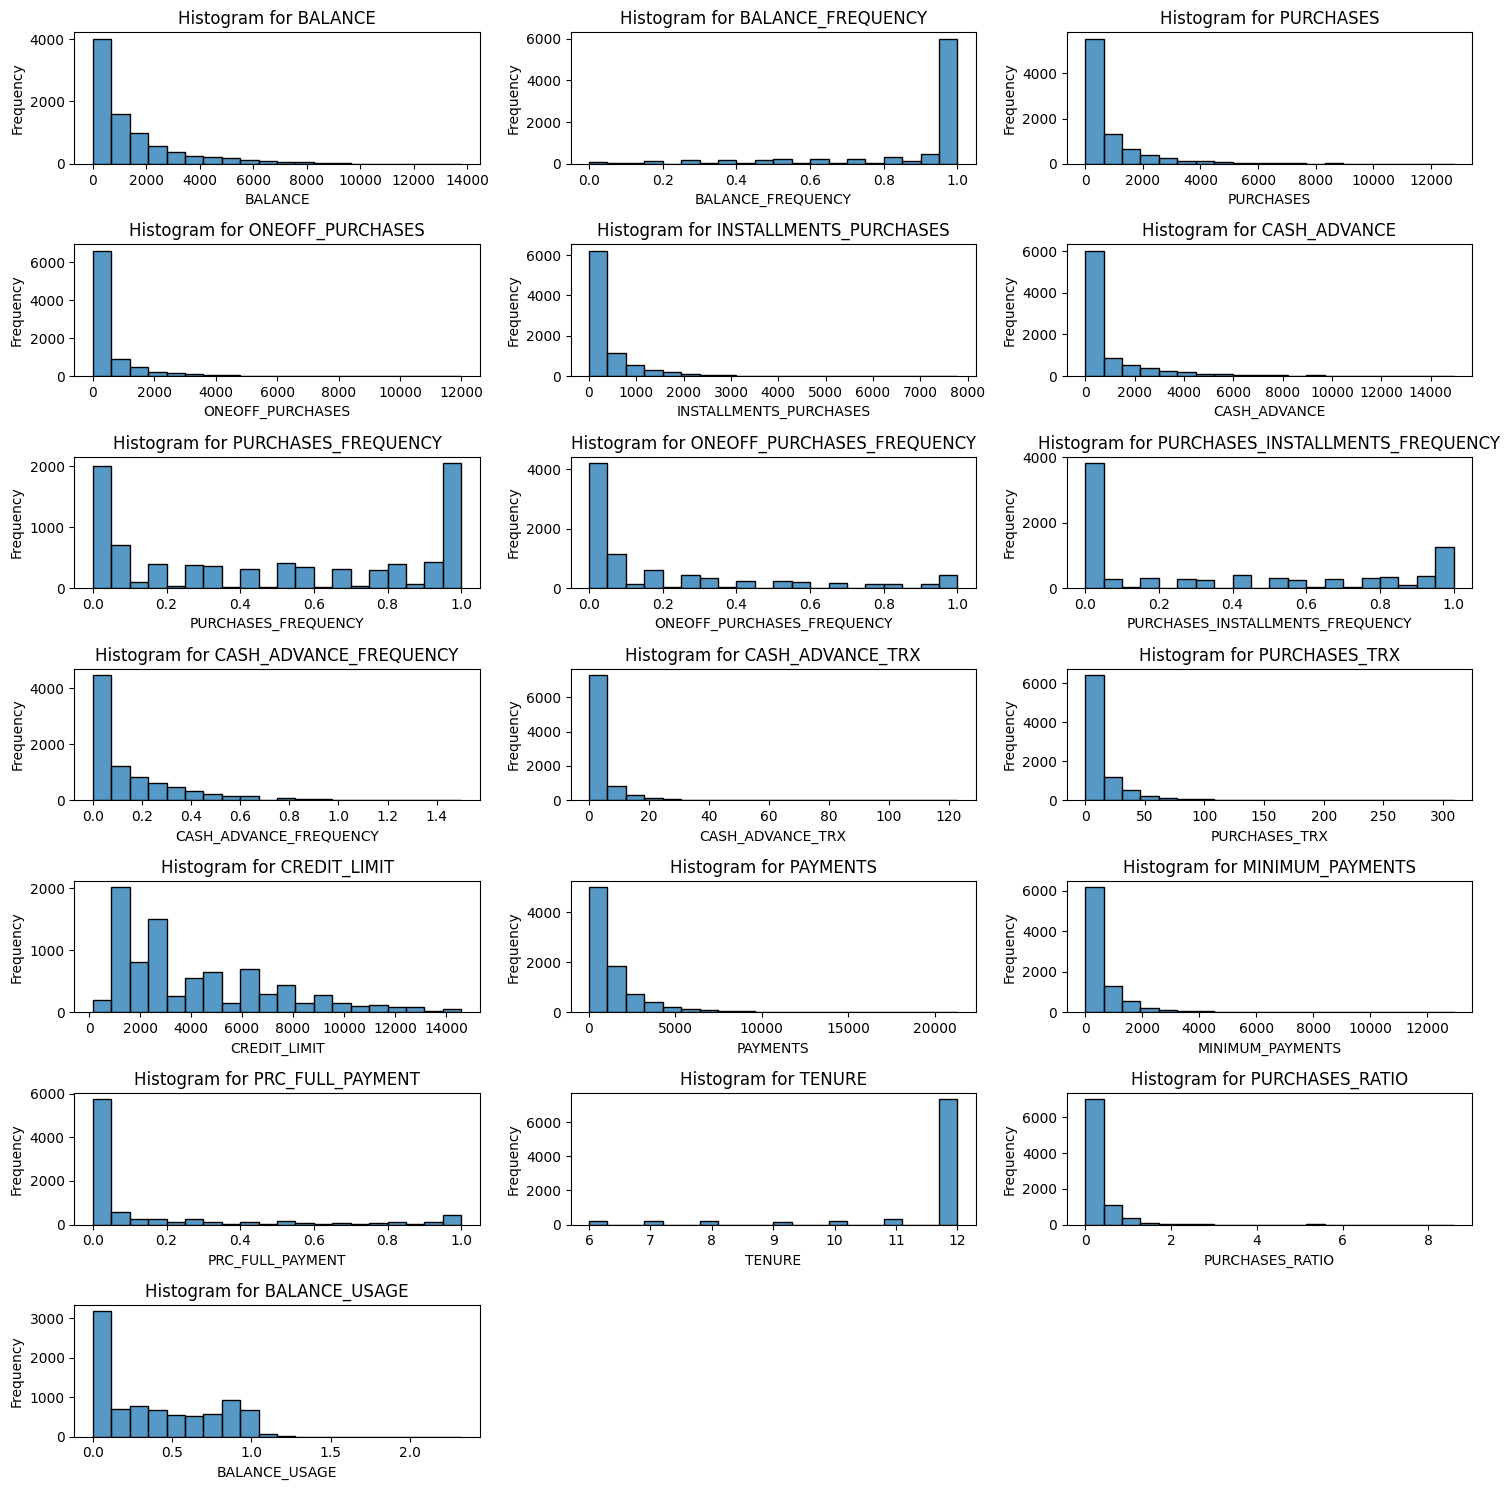

In [14]:
df_final=df.copy()
df=df.drop(columns=['CUST_ID'])
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten() 

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=20, kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

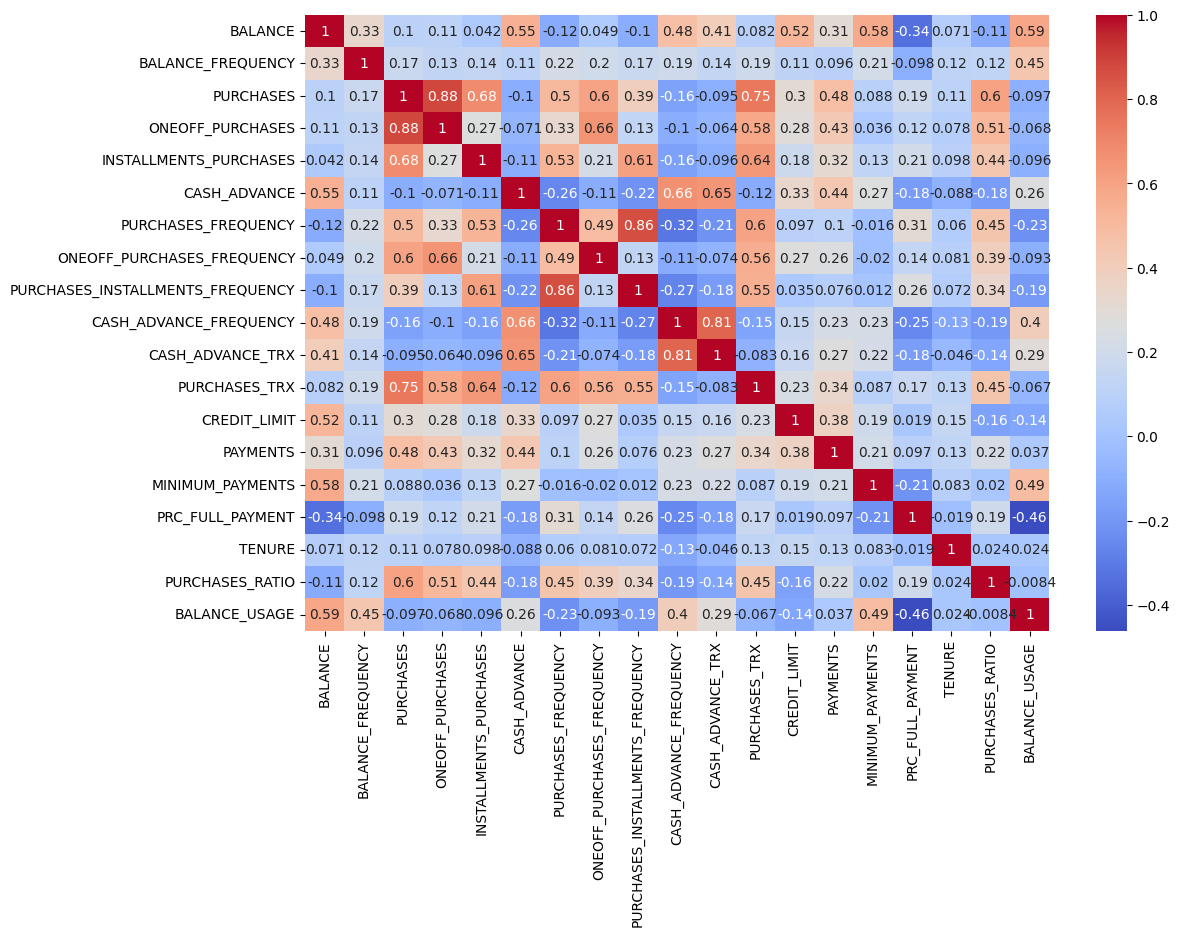

In [15]:
plt.figure(figsize=(12, 8))  # Change the values to increase/decrease the size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

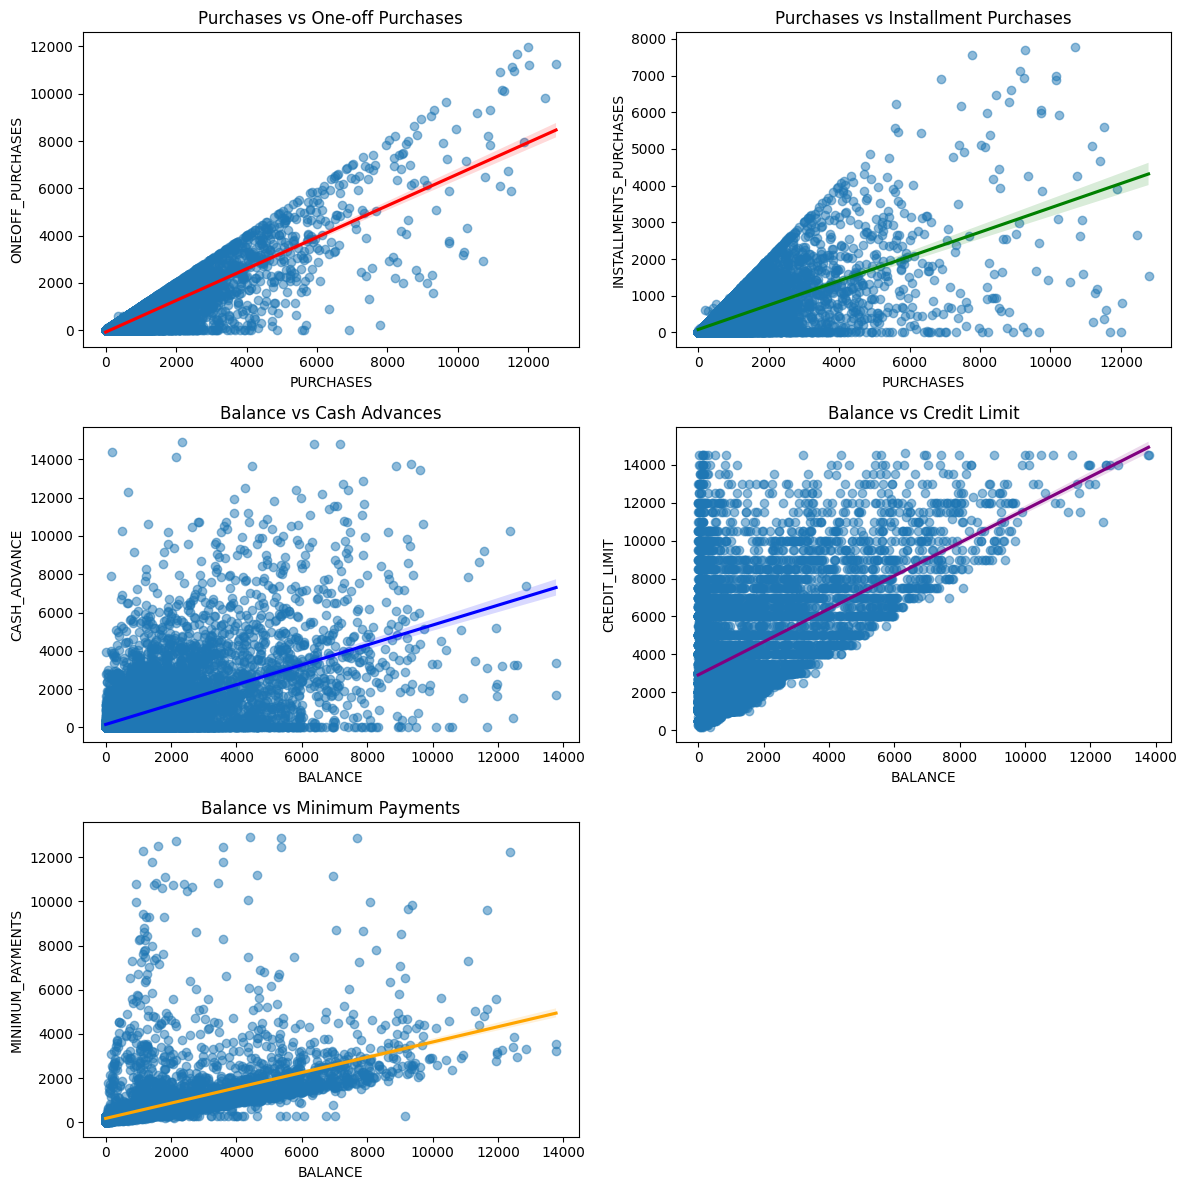

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))

# 1. Purchases vs One-off Purchases
sns.regplot(x='PURCHASES', y='ONEOFF_PURCHASES', data=df, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5}, ax=axes[0, 0])
axes[0, 0].set_title('Purchases vs One-off Purchases')

# 2. Purchases vs Installment Purchases
sns.regplot(x='PURCHASES', y='INSTALLMENTS_PURCHASES', data=df, line_kws={'color': 'green'}, scatter_kws={'alpha':0.5}, ax=axes[0, 1])
axes[0, 1].set_title('Purchases vs Installment Purchases')

# 3. Balance vs Cash Advances
sns.regplot(x='BALANCE', y='CASH_ADVANCE', data=df, line_kws={'color': 'blue'}, scatter_kws={'alpha':0.5}, ax=axes[1, 0])
axes[1, 0].set_title('Balance vs Cash Advances')

# 4. Balance vs Credit Limit
sns.regplot(x='BALANCE', y='CREDIT_LIMIT', data=df, line_kws={'color': 'purple'}, scatter_kws={'alpha':0.5}, ax=axes[1, 1])
axes[1, 1].set_title('Balance vs Credit Limit')

# 5. Balance vs Minimum Payments
sns.regplot(x='BALANCE', y='MINIMUM_PAYMENTS', data=df, line_kws={'color': 'orange'}, scatter_kws={'alpha':0.5}, ax=axes[2, 0])
axes[2, 0].set_title('Balance vs Minimum Payments')

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()


CLUSTERING
---

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
d2=scaler.fit_transform(df)

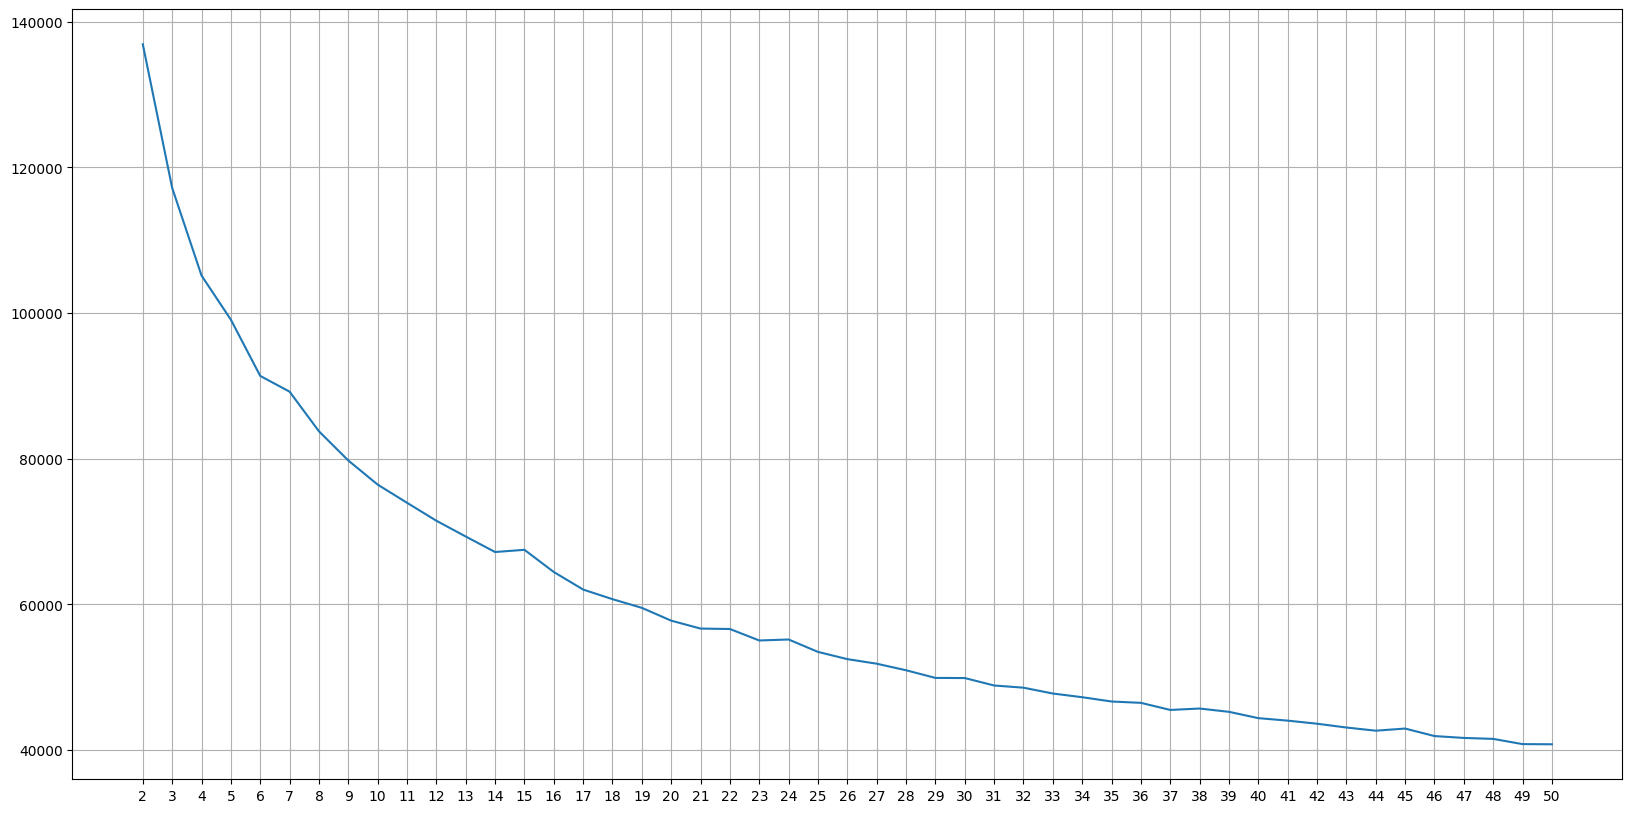

In [18]:
from sklearn.cluster import KMeans
WCSS=[]
for i in range (2,51):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(d2)
    WCSS.append(km.inertia_)
plt.figure(figsize=(20, 10))
plt.plot([i for i in range(2,51)], WCSS)
plt.grid(True)
plt.xticks([i for i in range(2, 51, 1)])
plt.show()

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_d2 = pca.fit_transform(d2)

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import ParameterGrid

param_grid = {'n_clusters': range(5, 10),  
              'max_iter': [200, 300, 400, 500, 600], 
              'n_init': [i for i in range(10,20,2)],
              'random_state':[42]} 
def Grid_Search(data):
    best_params = None
    best_sil_score = -1
    best_db_score=np.inf
    
    for params in ParameterGrid(param_grid):
        kmeans = KMeans(**params)
        cluster_labels = kmeans.fit_predict(data)
        
        silhouette_avg = silhouette_score(data, cluster_labels)
        db_avg=davies_bouldin_score(data,cluster_labels)
        
        if silhouette_avg > best_sil_score and db_avg < best_db_score:
            best_sil_score = silhouette_avg
            best_db_score = db_avg
            best_params = params
            
    print("Best Parameters: ", best_params)
    print("Best Silhouette Score: ", best_sil_score)
    print("Best Davies Bouldin Score: ", best_db_score)
    return best_sil_score,best_db_score


print("For Actual Dataset")
actual_sil, actual_db=Grid_Search(d2)
print("\nFor PCA Applied Dataset")
pca_sil, pca_db=Grid_Search(pca_d2)
print("\nWe shall go with","Actual Dataset" if actual_sil>=pca_sil and actual_db<=pca_db else "PCA Applied Dataset")

For Actual Dataset
Best Parameters:  {'max_iter': 200, 'n_clusters': 8, 'n_init': 10, 'random_state': 42}
Best Silhouette Score:  0.1943986502980656
Best Davies Bouldin Score:  1.523600204388197

For PCA Applied Dataset
Best Parameters:  {'max_iter': 200, 'n_clusters': 5, 'n_init': 16, 'random_state': 42}
Best Silhouette Score:  0.38007950248712086
Best Davies Bouldin Score:  0.8271624834696965

We shall go with PCA Applied Dataset


Silhoutte Score: 0.1943986502980656
Davies Bouldin Score: 1.523600204388197


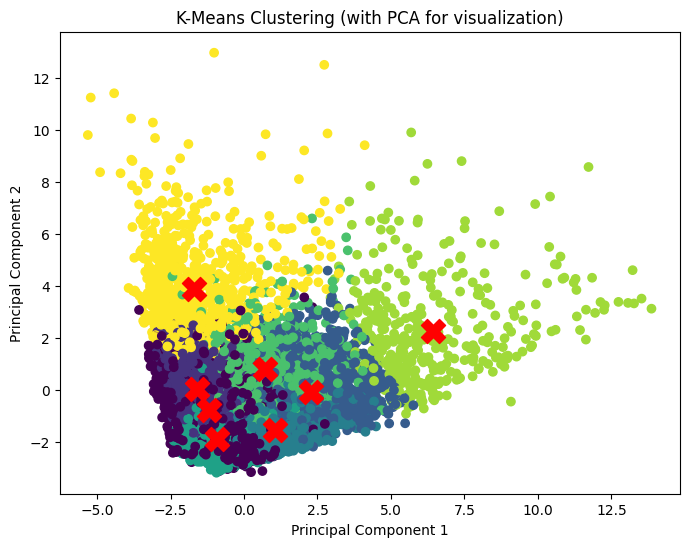

In [21]:
#clustering on actual data with PCA for visualization (just for reference)
kmeans = KMeans(n_clusters=8,n_init=10, max_iter=200, random_state=42)
kmeans_labels = kmeans.fit_predict(d2)
print("Silhoutte Score:",silhouette_score(d2, kmeans_labels))
print("Davies Bouldin Score:",davies_bouldin_score(d2, kmeans_labels))
plt.figure(figsize=(8, 6))
plt.scatter(pca_d2[:, 0], pca_d2[:, 1], c=kmeans_labels, cmap='viridis')
kmeans_centroids = kmeans.cluster_centers_
kmeans_centroids_pca = pca.transform(kmeans_centroids)
plt.scatter(kmeans_centroids_pca[:, 0], kmeans_centroids_pca[:, 1], s=300, c='red', marker='X')  # Plotting centroids

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (with PCA for visualization)')

plt.show()


Silhoutte Score: 0.38007950248712086
Davies Bouldin Score: 0.8271624834696965


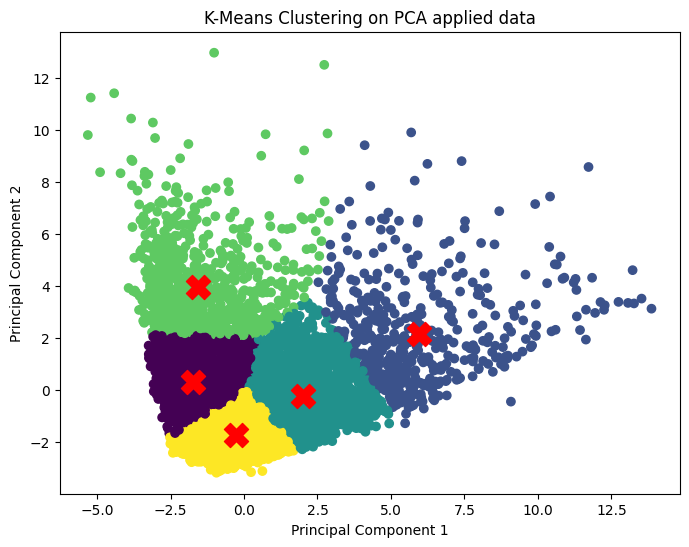

In [22]:
#clustering on pca data
kmeans_pca = KMeans(n_clusters=5, n_init=16, max_iter=200, random_state=42)
kmeans_pca_labels=kmeans_pca.fit_predict(pca_d2)
print("Silhoutte Score:",silhouette_score(pca_d2, kmeans_pca_labels))
print("Davies Bouldin Score:",davies_bouldin_score(pca_d2, kmeans_pca_labels))
plt.figure(figsize=(8, 6))
plt.scatter(pca_d2[:, 0], pca_d2[:, 1], c=kmeans_pca_labels, cmap='viridis')
kmeans_pca_centers = kmeans_pca.cluster_centers_
plt.scatter(kmeans_pca_centers[:, 0], kmeans_pca_centers[:, 1], s=300, c='red', marker='X')  # Plotting centroids

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA applied data')

plt.show()

In [23]:
kmeans_centers_scaled = pca.inverse_transform(kmeans_pca_centers)
kmeans_centers_original = scaler.inverse_transform(kmeans_centers_scaled)
print("Cluster centers in original data space:\n", kmeans_centers_original)

Cluster centers in original data space:
 [[ 1.85596200e+03  8.60653067e-01 -1.62164536e+01 -2.64927678e+01
   1.04050368e+01  1.52780391e+03  2.38947271e-01  6.01097976e-02
   1.52769080e-01  2.16004849e-01  5.37411922e+00  7.23676817e-01
   3.91758433e+03  1.15751304e+03  8.08089227e+02  5.39189618e-02
   1.13628089e+01  4.66636190e-02  4.89221458e-01]
 [ 2.68515853e+03  1.09592036e+00  4.54685865e+03  2.79318444e+03
   1.75444512e+03  8.90748876e+02  1.27707285e+00  7.51375362e-01
   1.00578959e+00  7.89384070e-02  2.81763319e+00  6.62546874e+01
   7.66644192e+03  4.63618115e+03  1.34421889e+03  3.30434609e-01
   1.21757590e+01  9.94557350e-01  3.56422750e-01]
 [ 1.11667515e+03  9.01553848e-01  1.92917873e+03  1.13778250e+03
   7.91904386e+02  2.92020448e+02  7.69482723e-01  3.58520718e-01
   5.97920266e-01  4.90330798e-02  9.41094055e-01  2.92472702e+01
   4.62021513e+03  2.02811038e+03  5.93765591e+02  2.56940875e-01
   1.16825416e+01  5.03353202e-01  2.78526536e-01]
 [ 4.74537983e

<Figure size 2000x1000 with 0 Axes>

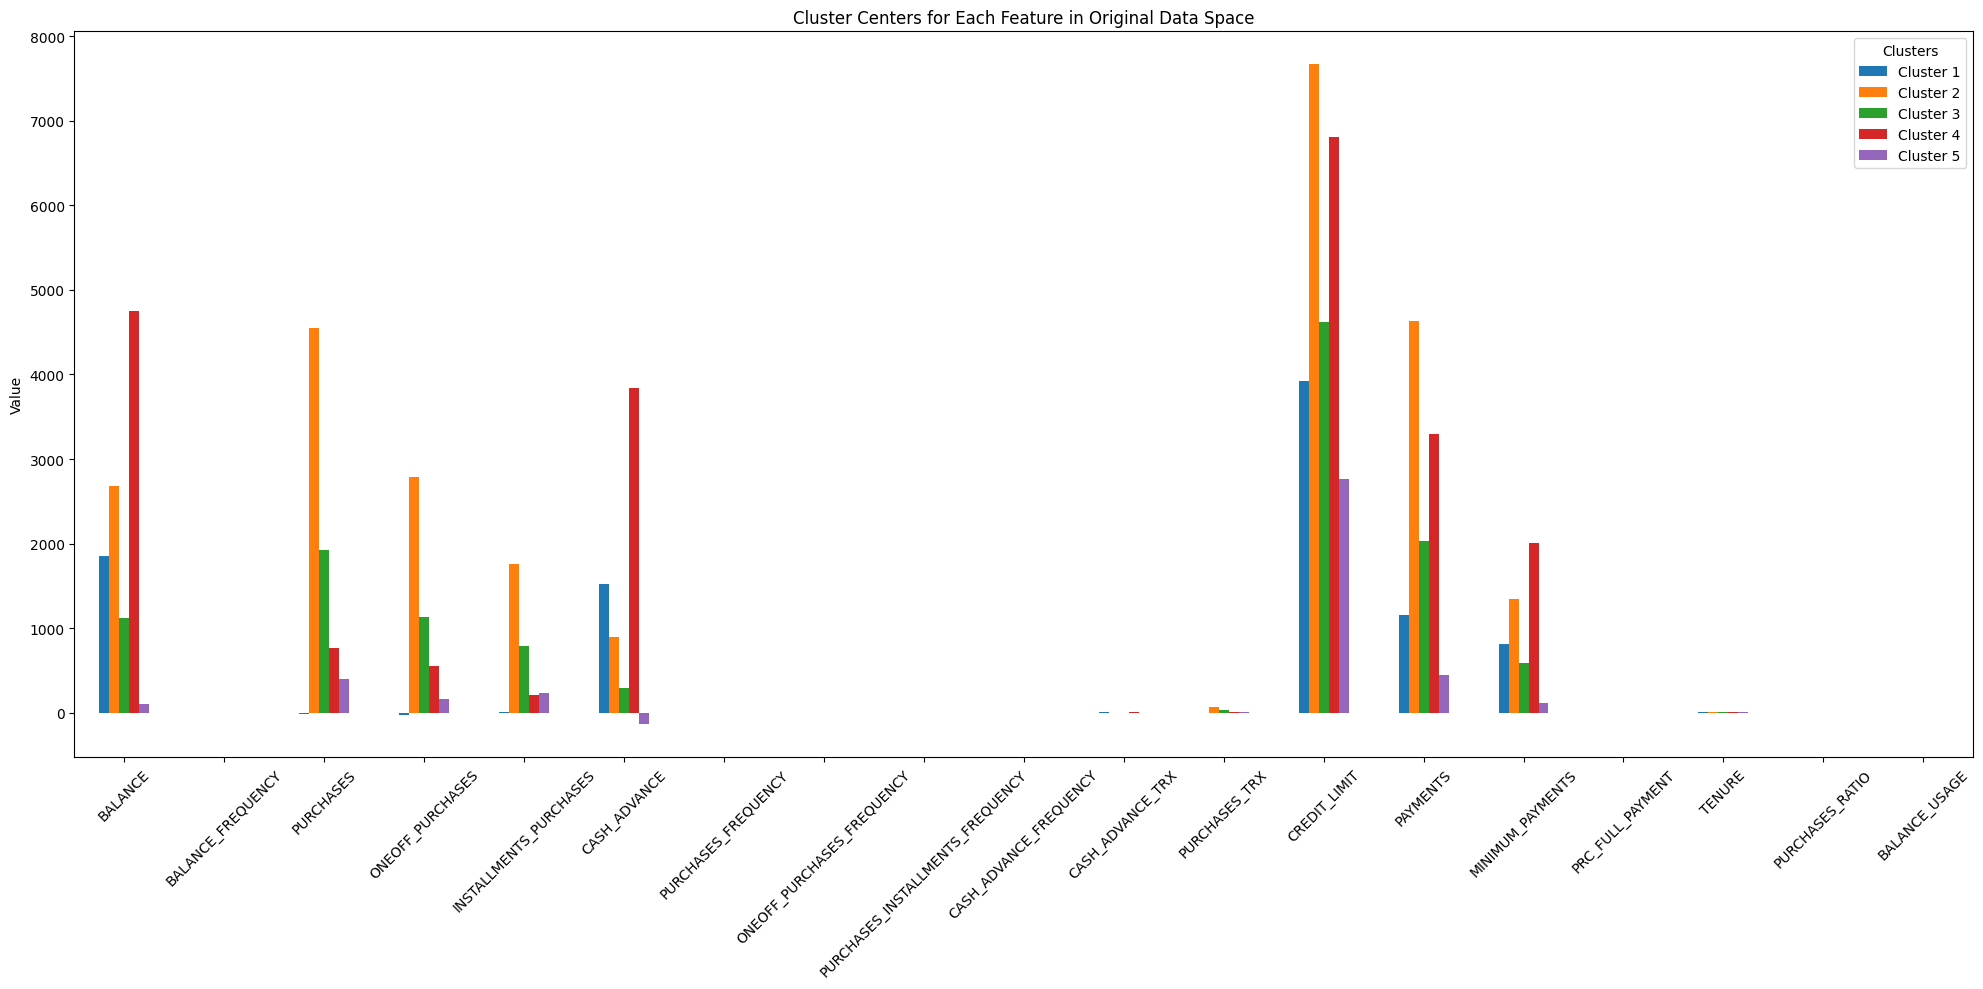

In [24]:
cluster_centers_df = pd.DataFrame(kmeans_centers_original, columns=df.columns)

plt.figure(figsize=(20, 10)) 
cluster_centers_df.T.plot(kind='bar', figsize=(20, 10)) 
plt.title('Cluster Centers for Each Feature in Original Data Space')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend([f'Cluster {i}' for i in range(1, len(cluster_centers_df)+1)], title='Clusters')

plt.tight_layout()
plt.show()


In [25]:
df_final['KMN_CLUSTER_LABELS']=kmeans_pca_labels+1
df_final['KMN_CATEGORY'] = np.where(df_final['KMN_CLUSTER_LABELS'].isin([1, 3]), "Moderate", 
                                    np.where(df_final['KMN_CLUSTER_LABELS'] == 5, "Low", "High"))
df_final

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_RATIO,BALANCE_USAGE,KMN_CLUSTER_LABELS,KMN_CATEGORY
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,0.095400,0.040901,5,Low
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,0.457495,4,High
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,0.103089,0.332687,3,Moderate
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,312.343947,0.000000,12,0.199867,0.222223,1,Moderate
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,0.013333,0.681429,1,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,6,1000.0,325.594462,48.886365,0.500000,6,0.291120,0.028494,5,Low
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,6,1000.0,275.861322,312.343947,0.000000,6,0.300000,0.019183,5,Low
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,5,1000.0,81.270775,82.418369,0.250000,6,0.144400,0.023399,5,Low
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,0,500.0,52.549959,55.755628,0.250000,6,0.000000,0.026915,5,Low


In [26]:
df_final['KMN_CLUSTER_LABELS'].value_counts()

KMN_CLUSTER_LABELS
5    2837
1    2622
3    1857
4     867
2     491
Name: count, dtype: int64

In [27]:
df_final['KMN_CATEGORY'].value_counts()

KMN_CATEGORY
Moderate    4479
Low         2837
High        1358
Name: count, dtype: int64

In [28]:
##################################

In [29]:
from sklearn.cluster import DBSCAN

param_grid = {
    'eps': np.arange(2.0, 3.0, 0.1),  # Range for epsilon values
    'min_samples': range(4, 11)  # Different values for minimum samples
}

def grid_search_dbscan(data):
    best_params = None
    best_silhouette = -1
    best_db = np.inf  # Start with infinity for Davies-Bouldin

    for params in ParameterGrid(param_grid):
        dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
        cluster_labels = dbscan.fit_predict(data)

        # Filter out noise points (labeled as -1)
        if len(set(cluster_labels)) > 1:  # At least two clusters must be present
            silhouette_avg = silhouette_score(data, cluster_labels)
            db_avg = davies_bouldin_score(data, cluster_labels)

            # Check for best silhouette score
            if silhouette_avg > best_silhouette and db_avg<best_db:
                best_silhouette = silhouette_avg
                best_db = db_avg
                best_params = params

    # Print best parameters and scores
    print("Best Parameters", best_params)
    print("Best Silhouette Score: ", best_silhouette)
    print("Best Davies-Bouldin Index: ", best_db)
    return best_silhouette, best_db

print("For Actual Dataset")
actual_sil_dbscan, actual_db_dbscan=grid_search_dbscan(d2)
print("\nFor PCA Applied Dataset")
pca_sil_dbscan, pca_db_dbscan=grid_search_dbscan(pca_d2)
print("\nWe shall go with","Actual Dataset" if actual_sil_dbscan>=pca_sil_dbscan and actual_db_dbscan<=pca_db_dbscan else "PCA Applied Dataset")

For Actual Dataset
Best Parameters {'eps': 2.900000000000001, 'min_samples': 4}
Best Silhouette Score:  0.4969337749615364
Best Davies-Bouldin Index:  1.349069982294244

For PCA Applied Dataset
Best Parameters {'eps': 2.7000000000000006, 'min_samples': 4}
Best Silhouette Score:  0.7148061998073416
Best Davies-Bouldin Index:  0.19566414979167443

We shall go with PCA Applied Dataset


Silhouette Score: 0.5042536384481848
Davies Bouldin Score: 1.3230856774213562


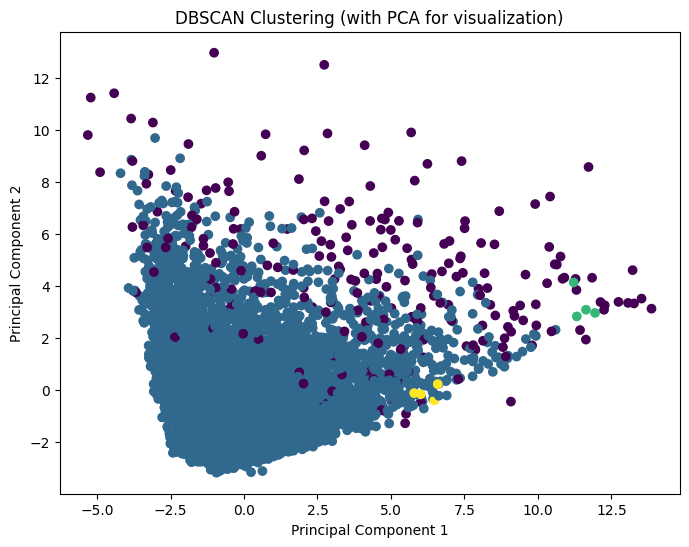

In [30]:
# Clustering on actual data with PCA for visualization (just for reference)
dbscan = DBSCAN(eps=3, min_samples=4)
dbscan_labels = dbscan.fit_predict(d2)
print("Silhouette Score:", silhouette_score(d2, dbscan_labels))
print("Davies Bouldin Score:", davies_bouldin_score(d2, dbscan_labels))

plt.figure(figsize=(8, 6))
plt.scatter(pca_d2[:, 0], pca_d2[:, 1], c=dbscan_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering (with PCA for visualization)')

plt.show()



Silhoutte Score: 0.7131296296254749
Davies Bouldin Score: 0.34697833530237127


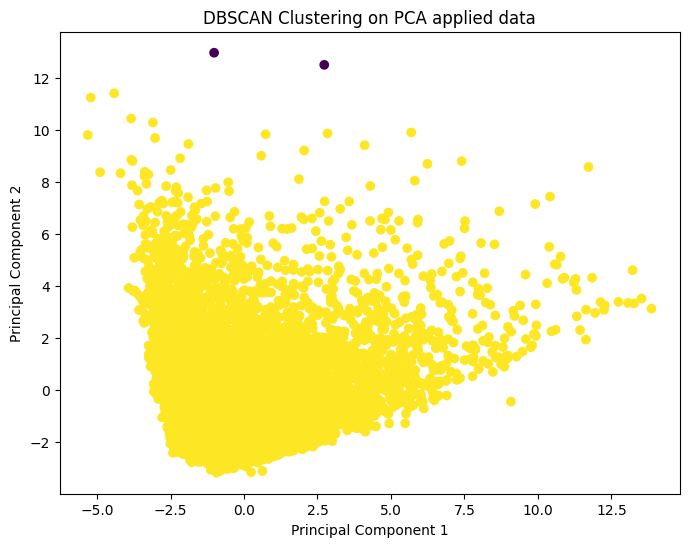

In [31]:
#clustering on pca data
dbscan_pca = DBSCAN(eps=2.7, min_samples=10)
dbscan_pca_labels=dbscan_pca.fit_predict(pca_d2)
print("Silhoutte Score:",silhouette_score(pca_d2, dbscan_pca_labels))
print("Davies Bouldin Score:",davies_bouldin_score(pca_d2, dbscan_pca_labels))

plt.figure(figsize=(8, 6))
plt.scatter(pca_d2[:, 0], pca_d2[:, 1], c=dbscan_pca_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA applied data')

plt.show()

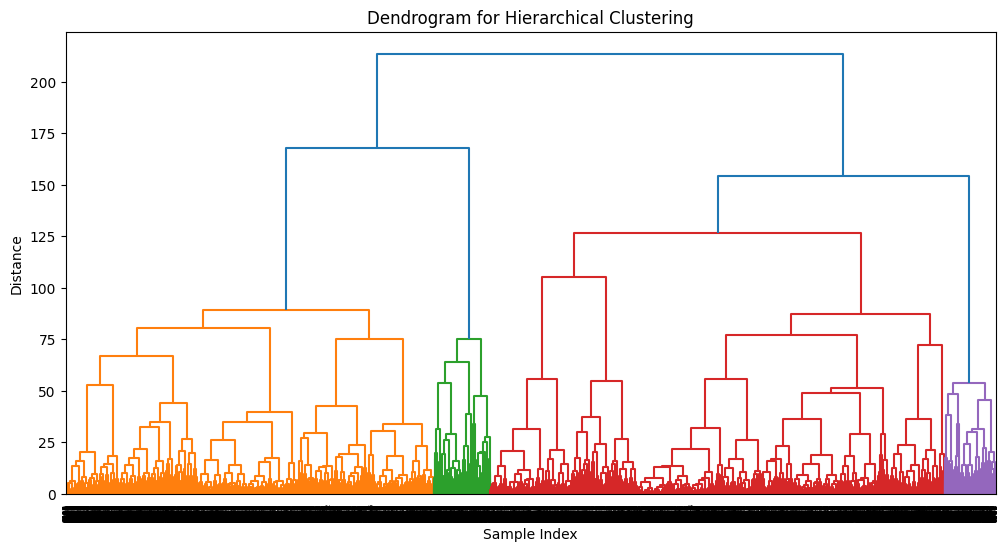

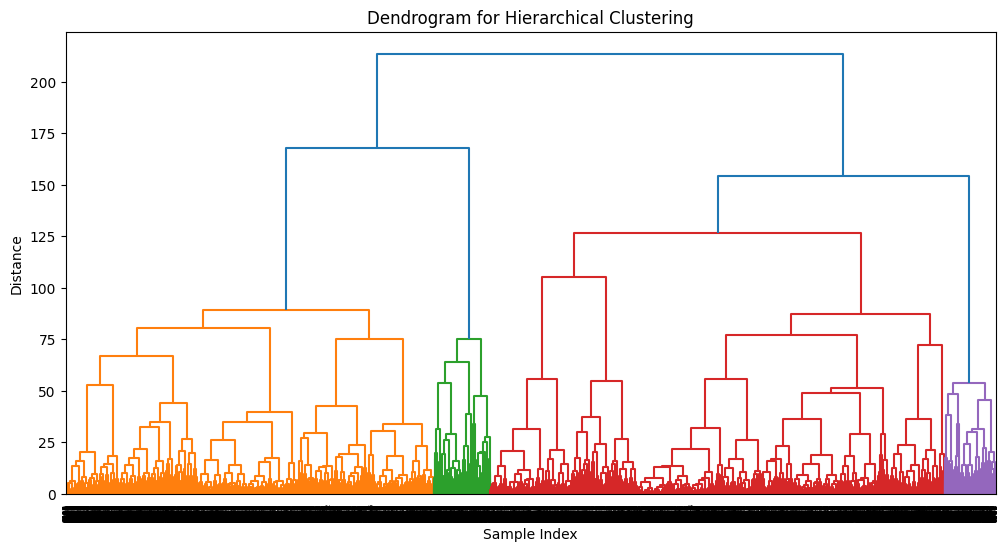

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

def draw_dendogram(data):
    linkage_matrix = linkage(d2, method='ward')
    
    plt.figure(figsize=(12, 6))
    dendrogram(linkage_matrix, 
               orientation='top', 
               distance_sort='descending', 
               show_leaf_counts=True)
    plt.title('Dendrogram for Hierarchical Clustering')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

draw_dendogram(d2)
draw_dendogram(pca_d2)



Silhoutte Score: 0.13771458829402533
Davies Bouldin Score: 1.8557719531169425


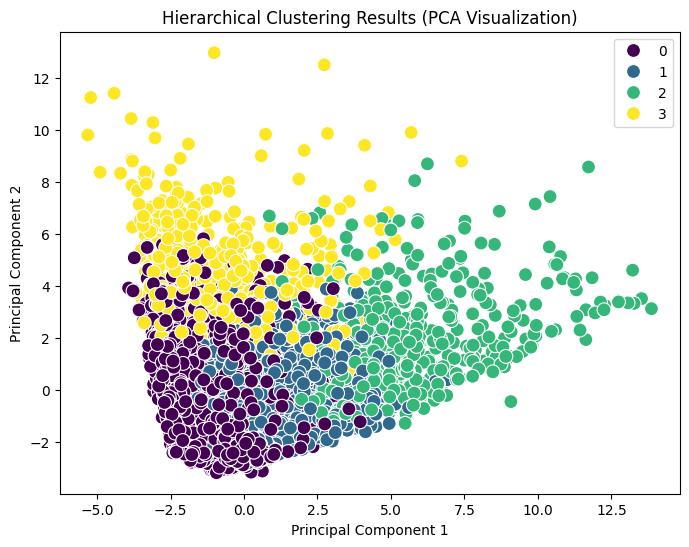

In [33]:
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(d2)
print("Silhoutte Score:",silhouette_score(d2, agg_labels))
print("Davies Bouldin Score:",davies_bouldin_score(d2, agg_labels))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_d2[:, 0], y=pca_d2[:, 1], hue=agg_labels, palette='viridis', s=100)
plt.title('Hierarchical Clustering Results (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Silhoutte Score: 0.3311015647252306
Davies Bouldin Score: 0.9069623587475094


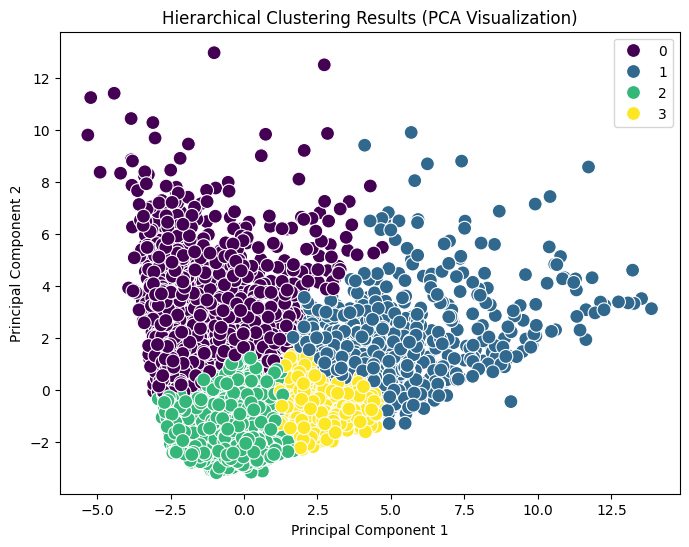

In [34]:
agg_pca = AgglomerativeClustering(n_clusters=4)
agg_pca_labels = agg_pca.fit_predict(pca_d2)
print("Silhoutte Score:",silhouette_score(pca_d2, agg_pca_labels))
print("Davies Bouldin Score:",davies_bouldin_score(pca_d2, agg_pca_labels))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_d2[:, 0], y=pca_d2[:, 1], hue=agg_pca_labels, palette='viridis', s=100)
plt.title('Hierarchical Clustering Results (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [35]:
df_clusters = df.copy()  # Keep the original dataframe intact
df_clusters['Cluster'] = agg_pca_labels+1  # Add cluster labels as a new column
df_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_RATIO,BALANCE_USAGE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.095400,0.040901,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,0.457495,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.103089,0.332687,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0.199867,0.222223,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.013333,0.681429,3


<Figure size 2000x1000 with 0 Axes>

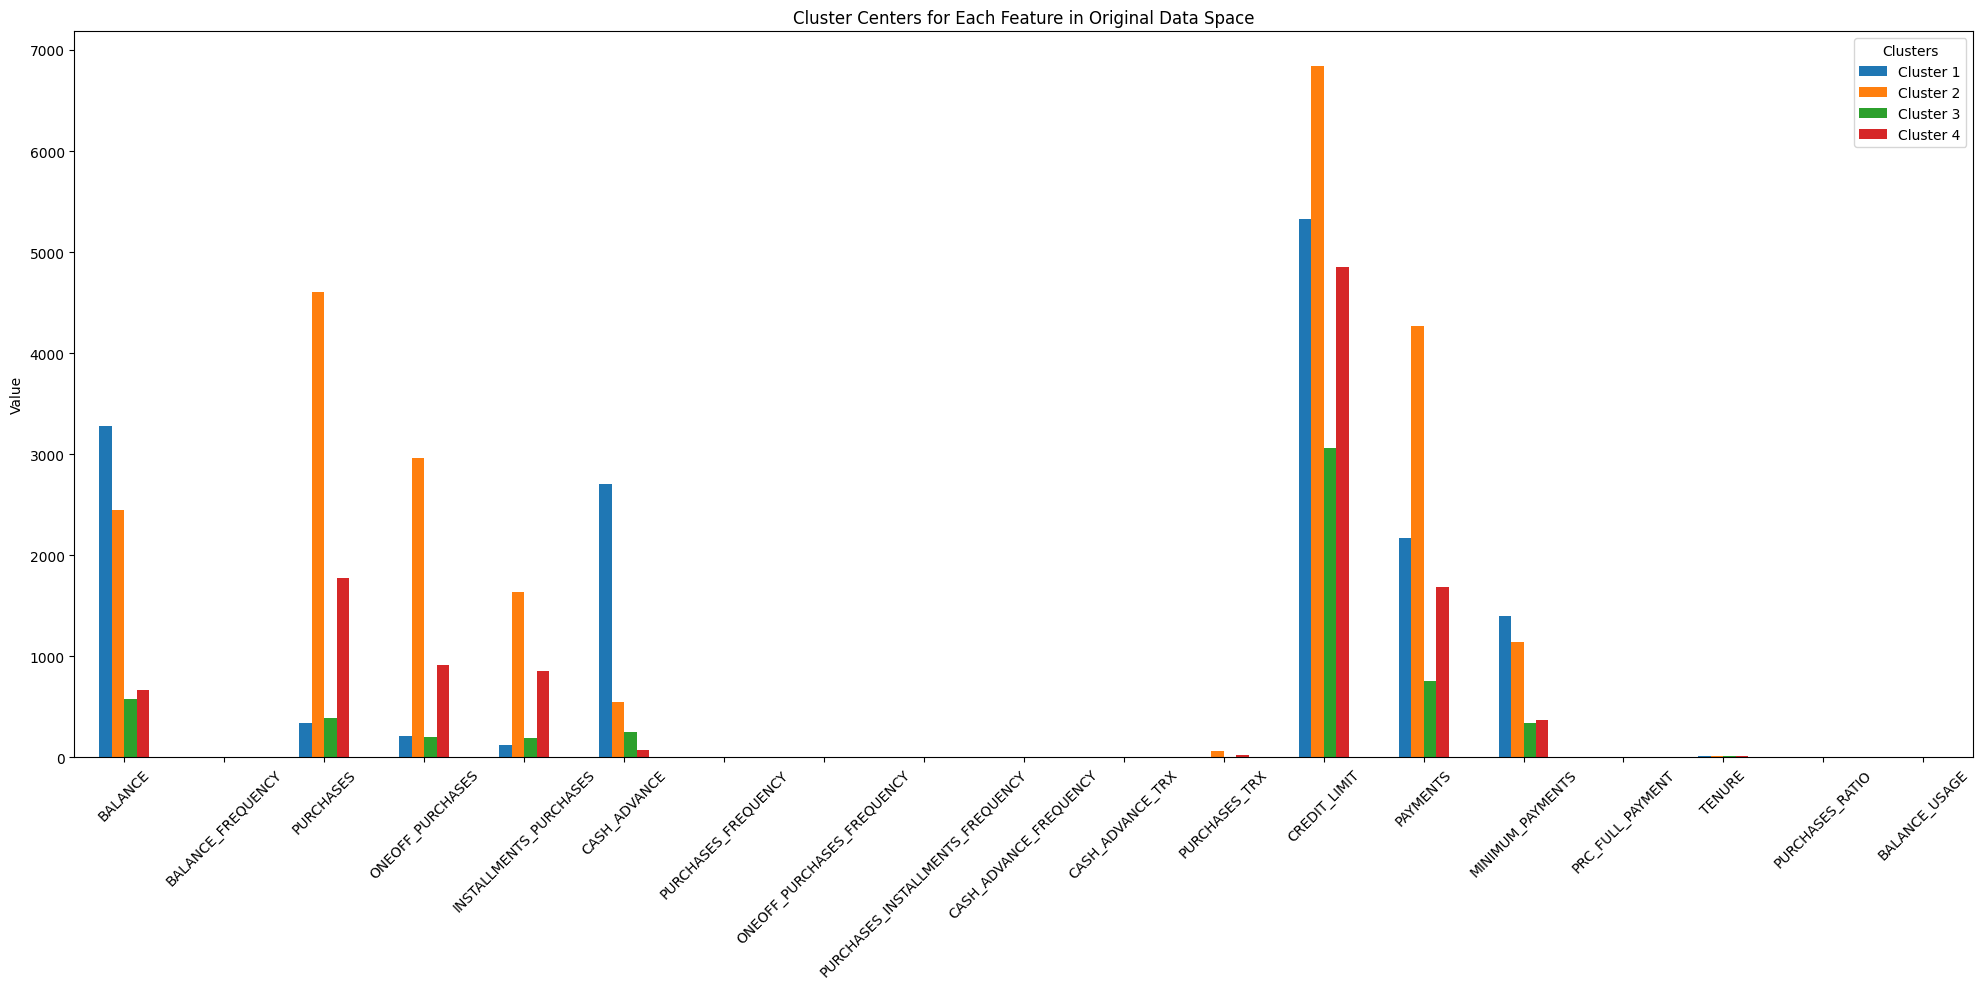

In [36]:
agg_cluster_centers = df_clusters.groupby('Cluster').mean()
cluster_centers_df = pd.DataFrame(agg_cluster_centers, columns=df.columns)

plt.figure(figsize=(20, 10))
cluster_centers_df.T.plot(kind='bar', figsize=(20, 10))
plt.title('Cluster Centers for Each Feature in Original Data Space')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend([f'Cluster {i+1}' for i in range(len(cluster_centers_df))], title='Clusters')

plt.tight_layout()
plt.show()


In [37]:
df_final['HRCL_CLUSTER_LABELS'] = agg_pca_labels + 1
df_final['HRCL_CATEGORY'] = np.where(df_final['HRCL_CLUSTER_LABELS'].isin([1, 2]), "High", 
                                    np.where(df_final['HRCL_CLUSTER_LABELS'] == 3, "Low", "Moderate"))
df_final

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_RATIO,BALANCE_USAGE,KMN_CLUSTER_LABELS,KMN_CATEGORY,HRCL_CLUSTER_LABELS,HRCL_CATEGORY
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,201.802084,139.509787,0.000000,12,0.095400,0.040901,5,Low,3,Low
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4103.032597,1072.340217,0.222222,12,0.000000,0.457495,4,High,1,High
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,622.066742,627.284787,0.000000,12,0.103089,0.332687,3,Moderate,3,Low
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,0.000000,312.343947,0.000000,12,0.199867,0.222223,1,Moderate,3,Low
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,678.334763,244.791237,0.000000,12,0.013333,0.681429,1,Moderate,3,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,325.594462,48.886365,0.500000,6,0.291120,0.028494,5,Low,3,Low
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,275.861322,312.343947,0.000000,6,0.300000,0.019183,5,Low,3,Low
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,81.270775,82.418369,0.250000,6,0.144400,0.023399,5,Low,3,Low
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,52.549959,55.755628,0.250000,6,0.000000,0.026915,5,Low,3,Low


In [38]:
df_final['HRCL_CLUSTER_LABELS'].value_counts()

HRCL_CLUSTER_LABELS
3    4521
1    2357
4    1153
2     643
Name: count, dtype: int64

In [39]:
df_final['HRCL_CATEGORY'].value_counts()

HRCL_CATEGORY
Low         4521
High        3000
Moderate    1153
Name: count, dtype: int64